In [40]:
suppressWarnings(require('pkgmaker',quietly = T))
require('plyr',quietly = T)
l_ply(c('dplyr',
        'plotly',
        'data.table',
        'jsonlite', 
        'rjson',
        'httr',
        'tidyr',  
        'reshape2',
        'factoextra',
        'kableExtra',
        'parallel',
        'doParallel',
        'scales',
        'StatMatch',
        'lattice',
        'utils',
        'missMDA',
        'RMariaDB',
        'pacman',
        'parmigene',
        'matrixTests',
        'hablar',
        'tibble', 
        'DEqMS'), function(pkg) {
          invisible(capture.output(irequire(pkg, quiet = T, autoinstall = T)))
        })

## Example data

In [2]:
# url <- "https://ftp.ebi.ac.uk/pride-archive/2016/06/PXD004163/Yan_miR_Protein_table.flatprottable.txt"
# download.file(url, destfile = "./data/miR_Proteintable.txt",method= "auto")

df.prot = read.table("./data/miR_Proteintable.txt",stringsAsFactors = FALSE,
                     header = TRUE, quote = "", comment.char = "",sep = "\t")
head(df.prot, 2)

Protein.accession,Gene,Associated.gene.ID,Description,Coverage,X..Proteins,Proteins.in.group,miR.FASP_..Unique.peptides,miR.FASP_..Peptides,miR.FASP_..PSMs,...,miR.FASP_tmt10plex_129N,miR.FASP_tmt10plex_129N.....quanted.PSMs,miR.FASP_tmt10plex_129C,miR.FASP_tmt10plex_129C.....quanted.PSMs,miR.FASP_tmt10plex_130N,miR.FASP_tmt10plex_130N.....quanted.PSMs,miR.FASP_tmt10plex_130C,miR.FASP_tmt10plex_130C.....quanted.PSMs,miR.FASP_tmt10plex_131,miR.FASP_tmt10plex_131.....quanted.PSMs
A2M,NA,ENSG00000175899,alpha-2-macroglobulin [Source:HGNC Symbol;Acc:HGNC:7],NA,na,NA,8,9,12,...,0.8269960,11,0.7601787,11,0.9170174,11,0.8545436,11,0.6034764,11
A2ML1,NA,ENSG00000166535,alpha-2-macroglobulin-like 1 [Source:HGNC Symbol;Acc:HGNC:23336],NA,na,NA,1,1,1,...,0.9976961,1,1.2686841,1,1.1331769,1,1.3361156,1,1.1255814,1


In [3]:
TMT_columns = seq(15,33,2)
dat = df.prot[df.prot$miR.FASP_q.value<0.01,TMT_columns]
rownames(dat) = df.prot[df.prot$miR.FASP_q.value<0.01,]$Protein.accession
rm(df.prot) # release memory since using dat from here on
head(dat, 2)

,miR.FASP_tmt10plex_126,miR.FASP_tmt10plex_127N,miR.FASP_tmt10plex_127C,miR.FASP_tmt10plex_128N,miR.FASP_tmt10plex_128C,miR.FASP_tmt10plex_129N,miR.FASP_tmt10plex_129C,miR.FASP_tmt10plex_130N,miR.FASP_tmt10plex_130C,miR.FASP_tmt10plex_131
A2M,0.9308308,0.7720215,0.7079040,0.7893872,1.1513714,0.8269960,0.7601787,0.9170174,0.8545436,0.6034764
AAAS,0.9154370,0.9168362,0.9416988,0.8854413,0.9657291,0.8474254,0.9044735,1.1462708,0.9201587,1.0190892


In [4]:
min(dat, na.rm = TRUE)

[1] 0.1501698

In [5]:
max(dat, na.rm = TRUE)

[1] 23.69688

In [6]:
head(log2(dat), 2)

,miR.FASP_tmt10plex_126,miR.FASP_tmt10plex_127N,miR.FASP_tmt10plex_127C,miR.FASP_tmt10plex_128N,miR.FASP_tmt10plex_128C,miR.FASP_tmt10plex_129N,miR.FASP_tmt10plex_129C,miR.FASP_tmt10plex_130N,miR.FASP_tmt10plex_130C,miR.FASP_tmt10plex_131
A2M,-0.1034091,-0.3732871,-0.49837439,-0.3411950,0.2033533,-0.2740477,-0.3955894,-0.1249790,-0.2267739,-0.72863073
AAAS,-0.1274675,-0.1252641,-0.08666234,-0.1755314,-0.0503095,-0.2388417,-0.1448499,0.1969479,-0.1200454,0.02728034


In [7]:
min(log2(dat), na.rm = TRUE)

[1] -2.735333

In [8]:
max(log2(dat), na.rm = TRUE)

[1] 4.566625

## Protein_intensity table

From /general_analysis/DataBaseUpload/NGS/Proteomics/bin/PhosphoProteomics_PreProccess.html:

Outlayiers: very low/high values (0.0001% and 99.9999%) were floored to these ranges. This believed to be an error and unlikely to be real value.

Possible reason: the original data have Inf. The R language calculated it to some extreme values.

In [10]:
# from /general_analysis/DataBaseUpload/NGS/Proteomics/bin/PhosphoProteomics_PreProccess.html
# `Counts` are just 2 to the power of Intensity. This is for DE analysis where counts are needed
# note: without filtering, the dimension is 1330824 rows
intensity <- read.csv("../proteomics/data/Protein_intensity.csv") %>% 
    filter(Intensity > -3.0)

In [53]:
head(intensity, 2)
print(dim(intensity))

id,Protein,ProteinGroup,ProteinGroupName,ProteinGroupId,Organism,Sample,Intensity,counts,hgnc_symbol
45243,sp|A0A087WV62|TVB16_HUMAN,sp|A0A087WV62|TVB16_HUMAN,TVB16_HUMAN,A0A087WV62,NULL,CTG-0158,15.503,NULL,NULL
45244,sp|A0A087WV62|TVB16_HUMAN,sp|A0A087WV62|TVB16_HUMAN,TVB16_HUMAN,A0A087WV62,NULL,CTG-0159,14.932,NULL,NULL


[1] 1330754      10


In [11]:
# check a case where there are repeats
# The intensity was not calculated differently between GAL3A and GAL3B
x <- intensity[intensity$Protein=='sp|A0A0B4J2D5|GAL3B_HUMAN',]
x[x$Sample=='CTG-0158',]

,id,Protein,ProteinGroup,ProteinGroupName,ProteinGroupId,Organism,Sample,Intensity,counts,hgnc_symbol
114,45356,sp|A0A0B4J2D5|GAL3B_HUMAN,sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN,GAL3B_HUMAN,A0A0B4J2D5,NULL,CTG-0158,18.058,NULL,NULL
110184,155426,sp|A0A0B4J2D5|GAL3B_HUMAN,sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN,GAL3A_HUMAN,P0DPI2,NULL,CTG-0158,18.058,NULL,NULL


In [12]:
int_mtx <- intensity %>% 
    select(c('ProteinGroup', 'Sample', 'Intensity'))  %>% 
    pivot_wider(names_from = Sample, values_from = Intensity, values_fn = mean) %>% 
#     pivot_wider(names_from = Sample, values_from = Intensity) %>% 
    column_to_rownames('ProteinGroup')
head(int_mtx)
print(dim(int_mtx))
rm(intensity)  # release memory since using int_mtx from here on

,CTG-0158,CTG-0159,CTG-0160,CTG-0162,CTG-0163,CTG-0166,CTG-0167,CTG-0178,CTG-0184,CTG-0464,...,CTG-3794,CTG-3795,CTG-3796,CTG-3797,CTG-3799,CTG-3800,CTG-3801,CTG-3802,CTG-3803,CTG-3805
sp|A0A087WV62|TVB16_HUMAN,15.503,14.932,14.791,15.616,15.860,15.620,14.404,17.208,15.961,14.648,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN,18.058,15.959,16.403,16.609,17.808,17.707,16.961,17.071,16.576,17.171,...,19.154,18.021,18.640,17.470,19.184,18.883,19.659,19.406,18.087,19.928
sp|A0A0B4J2H0|HV69D_HUMAN;sp|A0A0C4DH29|HV103_HUMAN;sp|P01742|HV169_HUMAN;sp|P01743|HV146_HUMAN;sp|P0DP01|HV108_HUMAN,NA,NA,NA,NA,NA,NA,NA,NA,14.146,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp|A0A0C4DH25|KVD20_HUMAN;sp|P01619|KV320_HUMAN,NA,NA,NA,11.443,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp|A0A0U1RRE5|NBDY_HUMAN,13.970,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,14.185,14.753,14.812,NA,15.659,15.389,14.616,14.346,14.881
sp|A0A0U1RRL7|MMPOS_HUMAN,NA,16.280,NA,16.074,NA,NA,NA,15.504,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 8530  317


In [40]:
# If omitting all proteins with NA values, how many rows are left?
x <- na.omit(int_mtx)
dim(x)

[1] 298 317

In [46]:
# proportion of missin values
sum(is.na(int_mtx))/(dim(int_mtx)[1] * dim(int_mtx)[2])

[1] 0.5081165

The intensity is already in log-scale because it has negative values.

### Check the distribution of non-missing values

Missing values in proteomic data can be generally characterized into missing at random (MAR) and missing not at random (MNAR)2,3. 
+ MAR missing values mostly result from technical limitations and stochastic fluctuations in an abundance-independent manner.
+ MNAR missing values are more abundance-dependent that can be explained by the measurability of the corresponding peptides. 

Missing values in proteomic data are a mixture of MAR and MNAR. Although the real proportion is difficult to determine, it is believed that MNAR plays a dominant role in producing missing values.

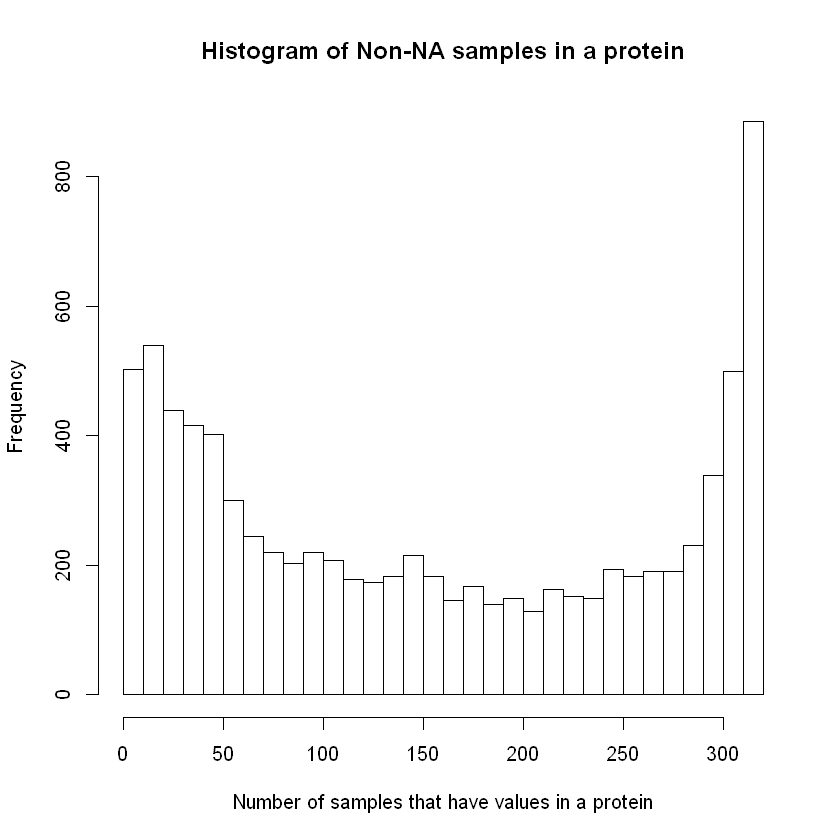

In [21]:
# For each protein group, how many samples have intensity values
hist(rowSums(!is.na(int_mtx)), breaks = 30,
     main = "Histogram of Non-NA samples in a protein",
     xlab = "Number of samples that have values in a protein")  

In [23]:
# # For each sample, how many protein groups have intensity values
# hist(colSums(!is.na(int_mtx)), breaks = 18,
#      main = "Histogram of Non-NA proteins in a sample",
#      xlab = "Number of proteins that have values in a sample")  

### Filtering and normalization

First, filter peptides with too many missing values. 

Seoncd, we need to account for technical variability in the amount of sample analyzed by the mass spectrometer from one run to another. This is an issue parallel to the variation in sequencing depth in RNAseq experiments. To normalize out these technical differences, we perform a median normalization. For each sample, the median of the log2-transformed distribution is subtracted from all the values.

In [43]:
# # This plot is to check if the data are currently median centered
# boxplot(int_mtx, las=2)

In [52]:
# Keep the peptide that were at least observed N_miss times
N_miss <- 80
int_norm <- int_mtx[rowSums(!is.na(int_mtx)) > N_miss,]
print(nrow(int_norm))
# proportion of missing values
print(sum(is.na(int_norm))/(dim(int_norm)[1] * dim(int_norm)[2]))
# # Bring the proprotion of missing values to below 30%

# Normalization
# subtract each value in a row with its respective row median
int_norm <- sweep(int_norm, 1, apply(int_norm, 1, function(x){median(x, na.rm = TRUE)}), '-') 
head(int_norm, 2)

[1] 5466
[1] 0.295393


,CTG-0158,CTG-0159,CTG-0160,CTG-0162,CTG-0163,CTG-0166,CTG-0167,CTG-0178,CTG-0184,CTG-0464,...,CTG-3794,CTG-3795,CTG-3796,CTG-3797,CTG-3799,CTG-3800,CTG-3801,CTG-3802,CTG-3803,CTG-3805
sp|A0A087WV62|TVB16_HUMAN,0.855,0.284,0.143,0.968,1.212,0.972,-0.244,2.560,1.313,0.000,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp|A0A0B4J2D5|GAL3B_HUMAN;sp|P0DPI2|GAL3A_HUMAN,0.675,-1.424,-0.980,-0.774,0.425,0.324,-0.422,-0.312,-0.807,-0.212,...,1.771,0.638,1.257,0.087,1.801,1.5,2.276,2.023,0.704,2.545


In [48]:
typeof(int_norm[2, 2])

[1] "double"

### Imputation

## Phosphorilation data

In [4]:
# # from /general_analysis/DataBaseUpload/NGS/Proteomics/bin/PhosphoProteomics_PreProccess.html
# # `Counts` are just 2 to the power of Intensity. This is for DE analysis where counts are needed
# phos <- read.csv("../proteomics/data/Protein_phos_data.csv")
# head(phos, 2)

id,ProteinGroupId,ProteinGroup,PhosLocation_Protein,SingleProtein,Sample,Intensity,Counts,ProteinGroupName,hgnc_symbol
1,A0A0B4J280,sp|A0A0B4J280|TVA40_HUMAN,S85,sp|A0A0B4J280|TVA40_HUMAN,CTG-0464,10.762,1737,TVA40_HUMAN,TRAV40
2,A0A0B4J280,sp|A0A0B4J280|TVA40_HUMAN,S85,sp|A0A0B4J280|TVA40_HUMAN,CTG-0502,12.949,7907,TVA40_HUMAN,TRAV40
3,A0A0B4J280,sp|A0A0B4J280|TVA40_HUMAN,S85,sp|A0A0B4J280|TVA40_HUMAN,CTG-0838,11.048,2117,TVA40_HUMAN,TRAV40
4,A0A0B4J280,sp|A0A0B4J280|TVA40_HUMAN,S85,sp|A0A0B4J280|TVA40_HUMAN,CTG-0852,9.974,1006,TVA40_HUMAN,TRAV40
5,A0A0B4J280,sp|A0A0B4J280|TVA40_HUMAN,S85,sp|A0A0B4J280|TVA40_HUMAN,CTG-1012,14.859,29717,TVA40_HUMAN,TRAV40
6,A0A0B4J280,sp|A0A0B4J280|TVA40_HUMAN,S85,sp|A0A0B4J280|TVA40_HUMAN,CTG-1329,10.467,1415,TVA40_HUMAN,TRAV40


In [49]:
# phos_int <- phos %>% 
#     select(c('ProteinGroup', 'Sample', 'Counts'))  %>% 
#     pivot_wider(names_from = Sample, values_from = Counts, values_fn = mean) %>% 
# #     pivot_wider(names_from = Sample, values_from = Intensity) %>% 
#     column_to_rownames('ProteinGroup')
# rm(phos)
# head(phos_int, 2)
# print(dim(phos_int))

,CTG-0464,CTG-0502,CTG-0838,CTG-0852,CTG-1012,CTG-1329,CTG-1352,CTG-1355,CTG-1360,CTG-1361,...,CTG-3799,CTG-2716,CTG-3064,CTG-3766,CTG-3793,CTG-3794,CTG-3796,CTG-3800,CTG-3801,CTG-3802
sp|A0A0B4J280|TVA40_HUMAN,1737,7907.00,2117.0,1006.0,29717,1415,9002.0,2095.00,9933,17487.00,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp|A0A0B4J2F2|SIK1B_HUMAN;sp|P57059|SIK1_HUMAN,85108,NA,24920.0,NA,19163,NA,28493.0,NA,34998,NA,...,44269.0,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp|A0AV96|RBM47_HUMAN,100790,7691.00,213370.0,158486.0,13950,54956,60515.0,65764.00,NA,99886.00,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
sp|A0AVK6|E2F8_HUMAN,NA,NA,5379.0,47413.0,48983,NA,13654.0,NA,16613,NA,...,142175.5,57970,7097.0,74606.25,201621.5,117374.0,79821.33,484060.7,296613.3,161540.5
sp|A0AVT1|UBA6_HUMAN,7297,7186.00,10241.0,127135.0,102339,7221,14951.0,NA,5753,11075.00,...,15896.0,6992,17227.5,19014.00,27799.5,32364.5,37154.00,53121.0,21865.0,38245.0
sp|A0FGR8|ESYT2_HUMAN,45663,23800.67,106055.7,124390.3,17854,156255,118950.3,32271.33,17892,64168.33,...,59269.0,60893,4523.0,8164.00,13373.0,9548.0,33364.00,14125.0,NA,29553.0


[1] 5680  209


In [42]:
# x <- na.omit(phos_int)
# dim(x)

[1] 135 209

In [50]:
# # proportion of missin values
# sum(is.na(phos_int))/(dim(phos_int)[1] * dim(phos_int)[2])

[1] 0.5555218